***Import Data***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dataset Gaji Karyawan.csv to Dataset Gaji Karyawan.csv


In [3]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['Dataset Gaji Karyawan.csv']))

In [4]:
df.head()

,tahun_berkerja,gaji
0,1,3900000
1,2,4600000
2,3,3700000
3,4,4300000
4,5,3900000


***garis regresi linear***

In [5]:
df['tahun_berkerja'] = df['gaji']

<Axes: xlabel='tahun_berkerja', ylabel='gaji'>

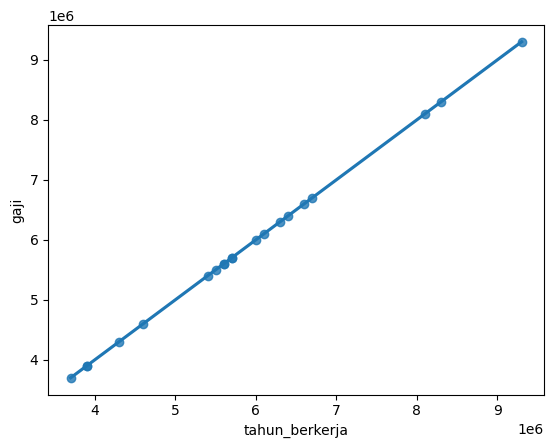

In [6]:
sns.regplot(x='tahun_berkerja',y='gaji',data=df)

***Polyfit***

In [7]:
X = df['tahun_berkerja']
y = df['gaji']

In [8]:
np.polyfit(X,y,1)

array([1.00000000e+00, 3.07163959e-09])

***Lebih dari 1 Variabel***

In [11]:
df = pd.read_csv(io.BytesIO(uploaded['Dataset Gaji Karyawan.csv']))

In [12]:
X = df.drop('gaji',axis=1)
y = df['gaji']

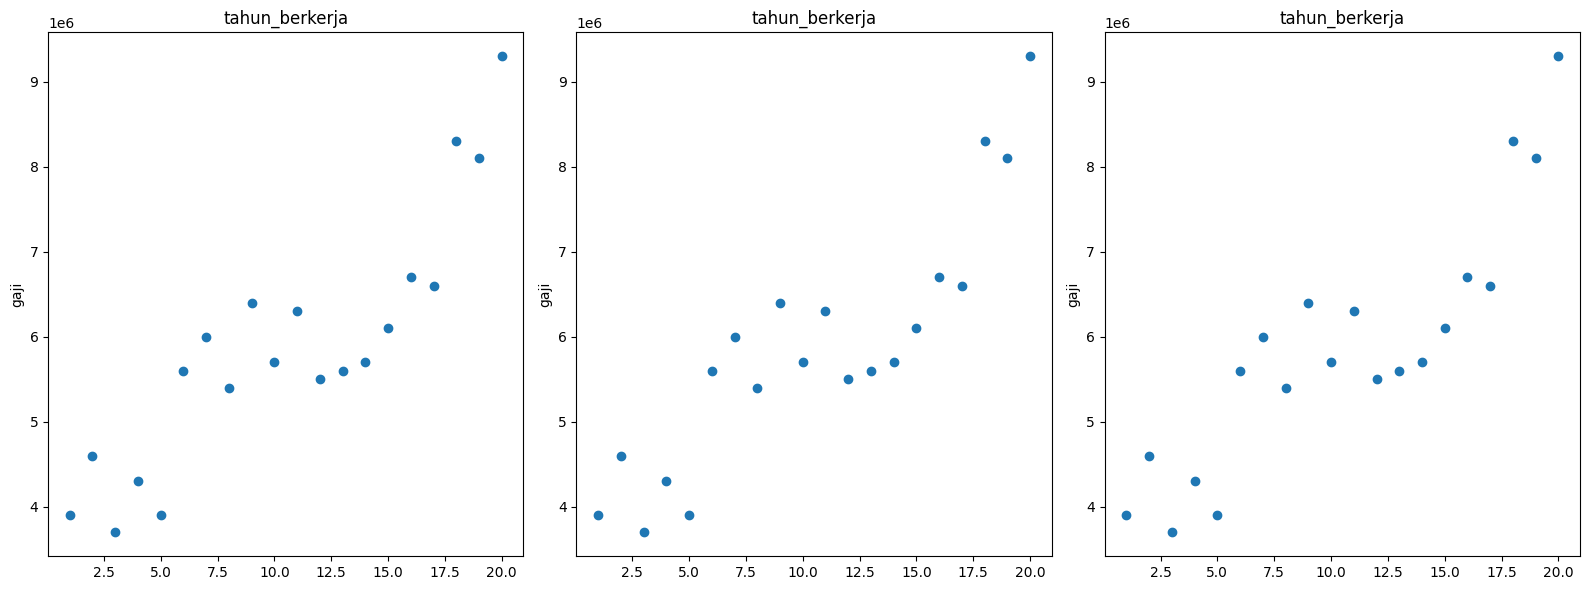

In [13]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['tahun_berkerja'],df['gaji'],'o')
axes[0].set_ylabel("gaji")
axes[0].set_title("tahun_berkerja")

axes[1].plot(df['tahun_berkerja'],df['gaji'],'o')
axes[1].set_title("tahun_berkerja")
axes[1].set_ylabel("gaji")

axes[2].plot(df['tahun_berkerja'],df['gaji'],'o')
axes[2].set_title("tahun_berkerja");
axes[2].set_ylabel("gaji")
plt.tight_layout();

***Train-test split***

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

***Membuat model***

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train,y_train)

LinearRegression()

***Menguji model***

In [19]:
test_predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)

In [22]:
print(MAE, MSE)

398401.82648401824 231564083317.69565


***Koefisien***

In [23]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
tahun_berkerja,230136.986301


***Plot prediksi***

In [24]:
y_hat = model.predict(X)

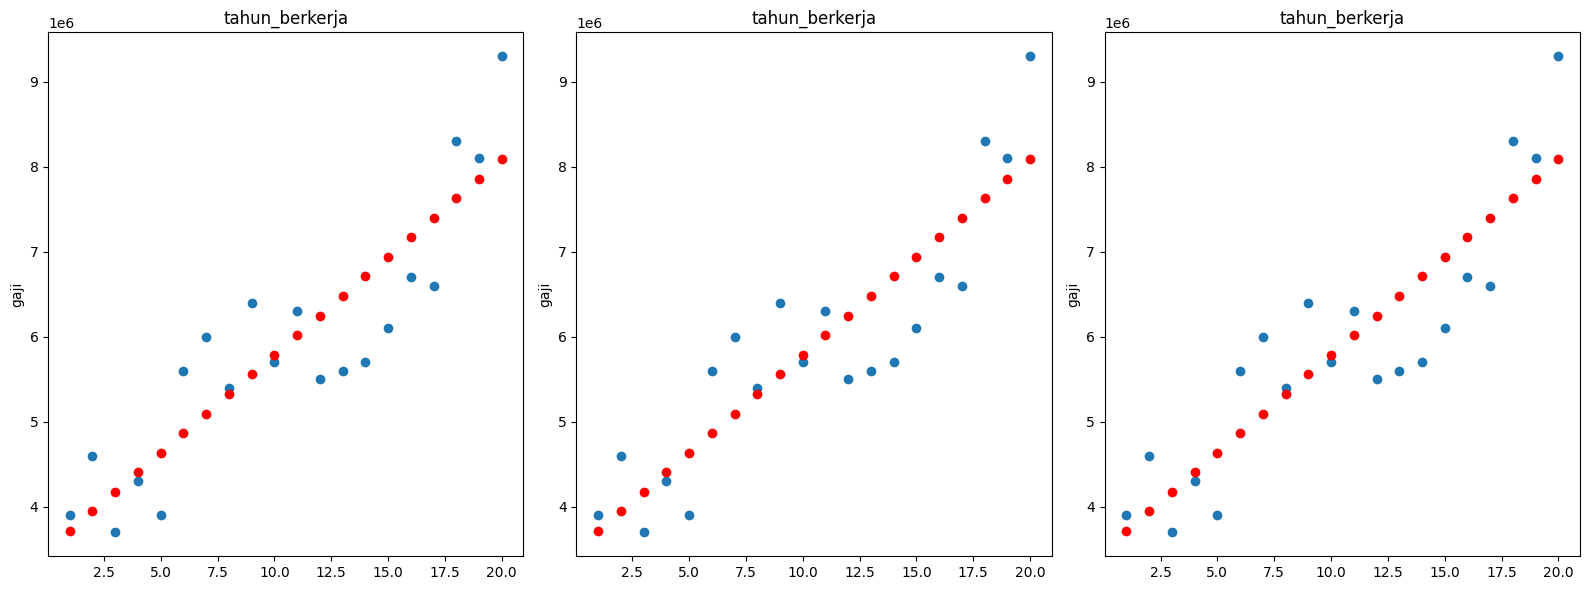

In [25]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['tahun_berkerja'],df['gaji'],'o')
axes[0].plot(df['tahun_berkerja'],y_hat,'o',color='red')
axes[0].set_ylabel("gaji")
axes[0].set_title("tahun_berkerja")

axes[1].plot(df['tahun_berkerja'],df['gaji'],'o')
axes[1].plot(df['tahun_berkerja'],y_hat,'o',color='red')
axes[1].set_title("tahun_berkerja")
axes[1].set_ylabel("gaji")

axes[2].plot(df['tahun_berkerja'],df['gaji'],'o')
axes[2].plot(df['tahun_berkerja'],y_hat,'o',color='red')
axes[2].set_title("tahun_berkerja");
axes[2].set_ylabel("gaji")
plt.tight_layout();

***Polynomial Regression***

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

***Train-test split***

In [28]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

***Membuat model***

In [29]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression()

***Mengevaluasi model***

In [30]:
test_predictions = model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
print(MAE, MSE)

500351.45318490063 329056543437.9113


***Regularization***

In [32]:
df = pd.read_csv(io.BytesIO(uploaded['Dataset Gaji Karyawan.csv']))
X = df.drop('gaji',axis=1)
y = df['gaji']

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

***Train-test split***

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

***Scale data***

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [39]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

***Ridge Regression***

In [40]:
from sklearn.linear_model import Ridge

In [41]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train,y_train)
test_predictions = ridge_model.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [43]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
print(MAE, MSE)

500635.7198590191 373777719326.7757


In [44]:
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

639729.0440274206

***Memilih alpha dengan cross-validation***

In [45]:
from sklearn.linear_model import RidgeCV

In [46]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [47]:
test_predictions = ridge_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
print(MAE, MSE)

500053.63960655703 333890847989.74884


In [48]:
train_predictions = ridge_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

594722.0931806802

***Lasso Regression***

In [49]:
from sklearn.linear_model import LassoCV

In [50]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [51]:
test_predictions = lasso_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
print(MAE, MSE)

552677.6179913292 411013675686.0376


***Elastic Net***

In [52]:
from sklearn.linear_model import ElasticNetCV

In [53]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
elastic_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.368e+11, tolerance: 3.026e+11
  model = cd_fast.enet_coordinate_descent(


ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [54]:
test_predictions = elastic_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
print(MAE, MSE)

507511.508162155 346821259719.3335


***Logistic Regression***

***Import Data***

In [55]:
uploaded = files.upload()

Saving Dataset Gaji Karyawan.csv to Dataset Gaji Karyawan (1).csv


In [71]:
df = pd.read_csv(io.BytesIO(uploaded['Dataset Gaji Karyawan (1).csv']))
df.head()

,tahun_berkerja,gaji
0,1,3900000
1,2,4600000
2,3,3700000
3,4,4300000
4,5,3900000


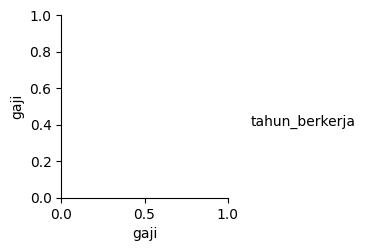

In [72]:
sns.pairplot(df,hue='tahun_berkerja')

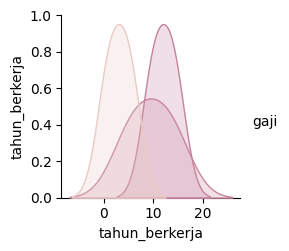

In [73]:
sns.pairplot(df,hue='gaji')

<Axes: >

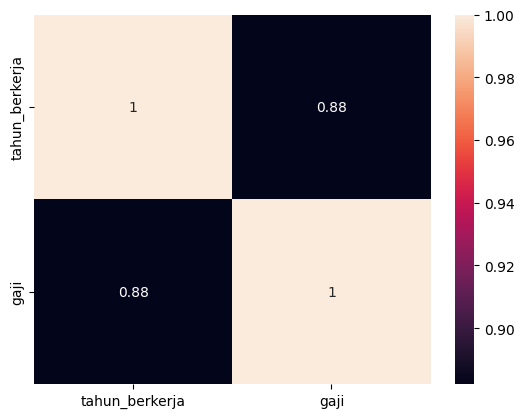

In [74]:
sns.heatmap(df.corr(),annot=True)

***Train-test split & scale data***

In [75]:
X = df.drop('tahun_berkerja',axis=1)
y = df['tahun_berkerja']

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [78]:
scaler = StandardScaler()

In [79]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

***Model***

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

***Evaluasi***

In [82]:
from sklearn.metrics import accuracy_score, classification_report

In [83]:
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.0

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.